<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/examples/3a_moving_averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load two `pandas` `DataFrame` objects, one called `shampoo` and one called `housing`, which contains the data used in Makridakis Chapter 3. 

In [39]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e3.sh > fetch_e3.sh
!bash fetch_e3.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   206  100   206    0     0    953      0 --:--:-- --:--:-- --:--:--   953
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   1704      0 --:--:-- --:--:-- --:--:--  1704
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  11682      0 --:--:-- --:--:-- --:--:-- 11647


# Taking a look at the data

Let's start by taking a look at a simple time series plot of the data sets, as well as the first 10 rows of the data by using the `.head()` function

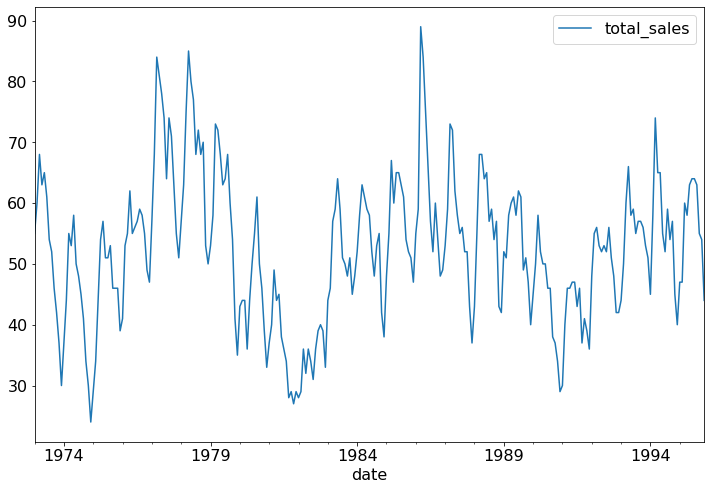

In [40]:
housing.plot()

In [41]:
housing.head(10)

,total_sales
date,
1973-01-01,55
1973-02-01,60
1973-03-01,68
1973-04-01,63
1973-05-01,65
1973-06-01,61
1973-07-01,54
1973-08-01,52
1973-09-01,46


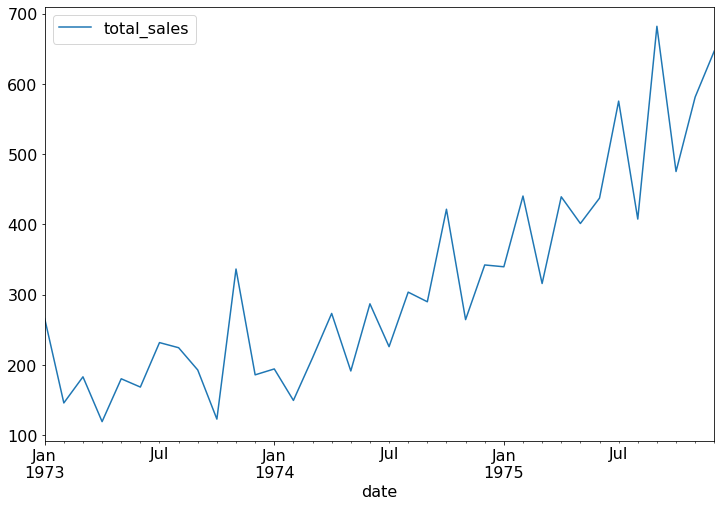

In [42]:
shampoo.plot()

In [43]:
shampoo.head(10)

,total_sales
date,
1973-01-01,266.0
1973-02-01,145.9
1973-03-01,183.1
1973-04-01,119.3
1973-05-01,180.3
1973-06-01,168.5
1973-07-01,231.8
1973-08-01,224.5
1973-09-01,192.8


To compute simple moving averages with our data, we can use the `.rolling()` function to produce a rolling window, followed by the statistic that we want to calculate, in this case `.mean()`. 

Note that we have to set the `center=True` option to center the resulting mean value on the center of our window. 

In [44]:
shampoo['3MA'] = shampoo['total_sales'].rolling(3, center=True).mean()
shampoo['5MA'] = shampoo['total_sales'].rolling(5, center=True).mean()
shampoo.head()

,total_sales,3MA,5MA
date,,,
1973-01-01,266.0,NaN,NaN
1973-02-01,145.9,198.333333,NaN
1973-03-01,183.1,149.433333,178.92
1973-04-01,119.3,160.900000,159.42
1973-05-01,180.3,156.033333,176.60


For a double moving average, we can first calculate the even-moving average in one column, then take the average of that in the next column. Note that the `rolling()` function will produce output shifted forward by one from what we need for our double moving average, so we'll have to use the `pandas` `shift()` function to move it back by one. This ensures that the centered moving average is centered on the correct value (e.g. the first value of our `2x4MA` lines up with the third element in the time series). 

In [45]:
shampoo['4MA_shifted'] = shampoo['total_sales'].rolling(4, center=True).mean()
shampoo['4MA'] = shampoo['4MA_shifted'].shift(-1)
shampoo['2x4MA'] = shampoo['4MA'].rolling(2, center=True).mean()
shampoo.head(10)

,total_sales,3MA,5MA,4MA_shifted,4MA,2x4MA
date,,,,,,
1973-01-01,266.0,NaN,NaN,NaN,NaN,NaN
1973-02-01,145.9,198.333333,NaN,NaN,178.575,NaN
1973-03-01,183.1,149.433333,178.92,178.575,157.150,167.8625
1973-04-01,119.3,160.900000,159.42,157.150,162.800,159.9750
1973-05-01,180.3,156.033333,176.60,162.800,174.975,168.8875
1973-06-01,168.5,193.533333,184.88,174.975,201.275,188.1250
1973-07-01,231.8,208.266667,199.58,201.275,204.400,202.8375
1973-08-01,224.5,216.366667,188.10,204.400,193.000,198.7000
1973-09-01,192.8,180.066667,221.70,193.000,219.175,206.0875


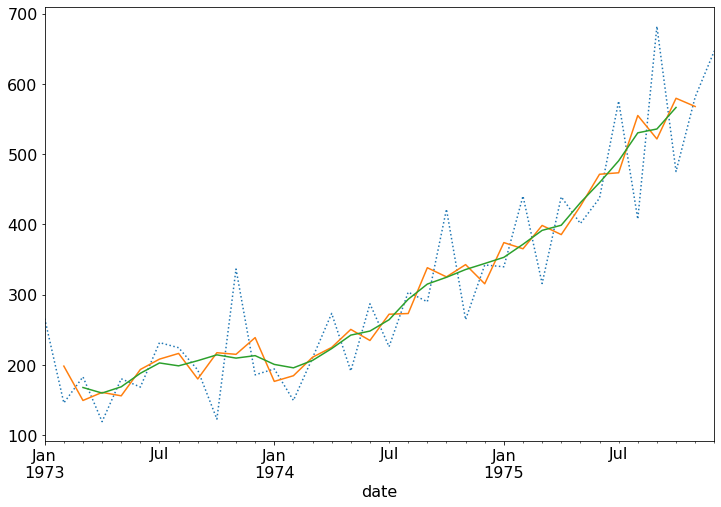

In [46]:
shampoo['total_sales'].plot(linestyle='dotted')
shampoo['3MA'].plot()
shampoo['2x4MA'].plot()

In [61]:
housing['2x12MA'] = housing['total_sales'].rolling(12, center=True).mean().shift(-1).rolling(2).mean()
housing['7MA'] = housing['total_sales'].rolling(7, center=True).mean()
housing.head(10)

,total_sales,2x6MA,7MA,2x12MA
date,,,,
1973-01-01,55,NaN,NaN,NaN
1973-02-01,60,NaN,NaN,NaN
1973-03-01,68,NaN,NaN,NaN
1973-04-01,63,61.916667,60.857143,NaN
1973-05-01,65,61.166667,60.428571,NaN
1973-06-01,61,58.666667,58.428571,NaN
1973-07-01,54,55.083333,54.714286,52.000000
1973-08-01,52,51.000000,51.000000,50.583333
1973-09-01,46,46.083333,46.000000,49.375000


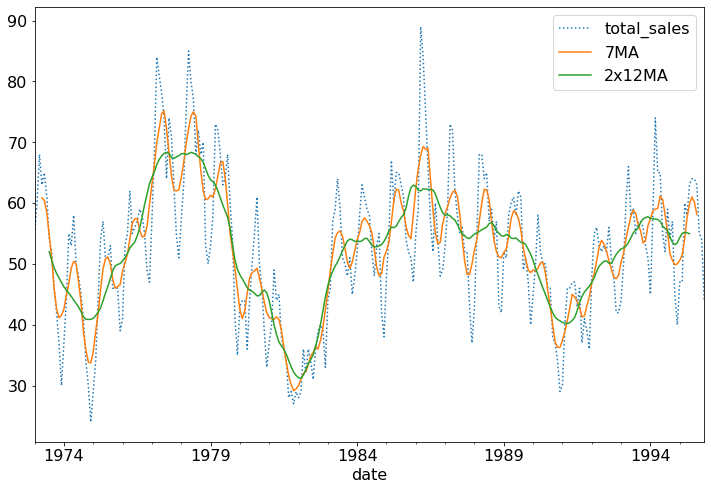

In [64]:
housing['total_sales'].plot(linestyle='dotted')
housing['7MA'].plot()
housing['2x12MA'].plot()
plt.legend()